## 1. Imports

In [21]:
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import decode_predictions

## 2. Cargar modelo

In [22]:
model = VGG16(weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## 3. Evaluar modelo

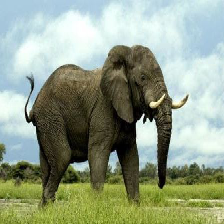

In [23]:
img_path = 'elefante.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img


In [24]:
prediccion = model.predict(x)
label = decode_predictions(prediccion)
label = label[0][0]
print('Predicción')
print('%s (%.2f%%)' % (label[1], label[2]*100))

Predicción
tusker (61.42%)


## 4. Tranfer Learning

Se realiza $\textit{transfer learning}$ luego de la capa "block5_pool (MaxPooling2D)".

In [25]:
model1 = VGG16(weights='imagenet', include_top=False, input_shape = (224, 224, 3))

In [26]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


# fijar pesos
for layer in model1.layers:
    layer.trainable = False
    
# agregando capas

x = model1.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)


modelo_final = Model(input = model1.input, output = predictions)
modelo_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')



C:\Users\queza\Documents\Anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [28]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [29]:
from random import randint
from skimage.transform import resize



def generar_mini_batch(X , y, batch_tamano):
    while True:
        n_batches = (len(X)/batch_tamano)
        batch_indice = randint(0, n_batches)
        inicio = batch_indice*batch_tamano
        fin = (batch_indice+1)*batch_tamano
        X_batch = np.zeros((batch_tamano, 224, 224, 3))
        
        for i in range(0,batch_tamano):
            X_batch[i] = resize(X[(inicio+i)], (224,224,3))
        y_batch = y[inicio:fin]
        yield X_batch, y_batch

In [30]:
callbacks = [checkpoint , early]
num_samples = 20000
batch_size = 100
epochs = 400
verbose = 2 #solo por epoca
steps_per_epoch = num_samples/batch_size
validation_steps = 10000/batch_size

train_generator = generar_mini_batch(X_train, Y_train, batch_size)
val_generator = generar_mini_batch(X_test, Y_test, batch_size)




In [ ]:
modelo_final.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, callbacks=callbacks, validation_data=val_generator, validation_steps=validation_steps)

In [ ]:
train_generator = generar_mini_batch(X_train, Y_train, batch_size)

In [32]:
a

NameError: name 'a' is not defined